In [ ]:
#Import your data into a Pandas DataFrame.
#Merge your DataFrames.
#Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
#Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for three city types.
#Determine the mean, median, and mode for the following:
    #The total number of rides for each city type.
    #The average fares for each city type.
    #The total number of drivers for each city type.
#Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    #The number of rides for each city type.
    #The fares for each city type.
    #The number of drivers for each city type.
#Create a pie chart that visualizes each of the following data for each city type:
    #The percent of total fares.
    #The percent of total rides.
    #The percent of total drivers.

In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [ ]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

In [ ]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

In [ ]:
# Get the columns and the rows that are not null.
city_data_df.count()

In [ ]:
# Get the columns and the rows that are not null., another way to run it 
city_data_df.isnull().sum()

In [ ]:
# Get the data types of each column. We need to check if the driver_count column has numerical data types 
city_data_df.dtypes

In [ ]:
# Get the unique values of the type of city. Checking how many data types there are for each type city
city_data_df["type"].unique()

In [ ]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

In [ ]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

In [ ]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

In [ ]:
# Get the columns and the rows that are not null.
ride_data_df.count()

In [ ]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

In [ ]:
# Get the data types of each column. Makign sure ride_id column is numerical 
ride_data_df.dtypes

In [ ]:
#Merging data frames 
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

In [ ]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

In [ ]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

In [ ]:
#We’ll use the groupby() function to create a Series of data that has the name of the city as the index, apply the count() method to the Series for each city, and select the ride_id column.
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

In [ ]:
# Create the suburban ride count 
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

In [ ]:
#Create the rural ride count 
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

In [ ]:
# Get average fare for each city in the urban cities. Chain the mean method to get averages of fare column
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

In [ ]:
# Get average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

In [ ]:
#Get average fare for each city in the rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

In [ ]:
# Get the average number of drivers for each urban city. Use groupby() function to get the mean() of driver_count column
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

In [ ]:
# Get the average number of drivers for each city for the suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

In [ ]:
# Get the average number of drivers for each city for the suburban and rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

In [ ]:
# Build the scatter plots for urban cities.
    #plt.scatter(urban_ride_count, urban_avg_fare)
# Build the scatter plots for urban cities.
#plt.scatter(urban_ride_count,
      #urban_avg_fare,
      #s=urban_driver_count)
##Keep Building it up
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

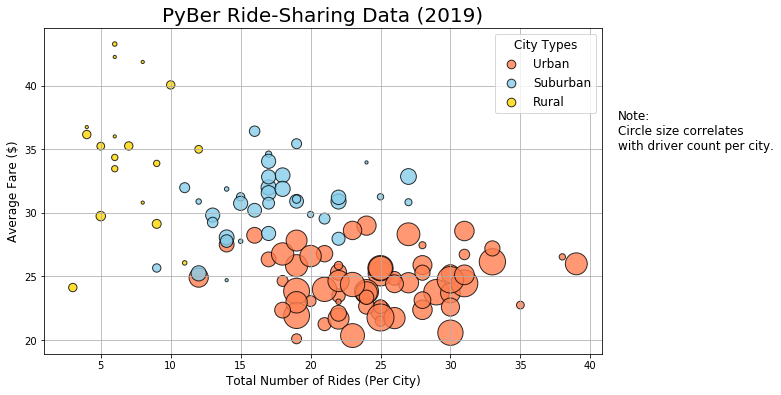

In [46]:
#We want to merge all charts to one mega bubble chart
# Add the scatter charts for each type of city.
#plt.scatter(urban_ride_count, 
      #urban_avg_fare, 
      #s=10*urban_driver_count, c="coral", 
      #edgecolor="black", linewidths=1, 
      #alpha=0.8, label="Urban")

#plt.scatter(suburban_ride_count, 
      #suburban_avg_fare, 
      #s=10*suburban_driver_count, c="skyblue", 
      #edgecolor="black", linewidths=1, 
      #alpha=0.8, label="Suburban")

#plt.scatter(rural_ride_count, 
      #rural_avg_fare, 
      #s=10*rural_driver_count, c="gold", 
      #edgecolor="black", linewidths=1, 
      #alpha=0.8, label="Rural")
        
#Edit our mega chart to make it look much nicer
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()